# <font color="green">***HOUSE PRICES PREDICTION***</font>

In order to work on the above problem, House Prices Prediction, we will need to do the following .
1.Define the question, 2.find the metric for success,3.  establish and explain the context,4. expound on the experimental design taken and 5. shed light on the appropriateness of the available data to answer the given question . We will also find and deal with outliers, anomalies, and missing data within the dataset if any. We  will also Perform ***univariate***, ***bivariate*** and ***multivariate analysis*** recording your observations  each of the analyses.
We will use ***Barlets Test*** to check for Multicolinearity. Lastly n the analysis , we will Implement the solution by performing the respective analysis on Regressions i.e. **Linear Regression** , **Quantile Regression**, **Ridge regression**, **Lasso Regression** and **Elastic Net Regression**. In conclusion we will challenge our solutions by providing insights on how you can make improvements.

# **1. Defining the question**

 Hass Consulting Company  is a real estate leader with over 25 years of experience. The  task is to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

## **a. Specifying the question**

Our task is to find patterns in the specifying the housing prices.We will use the Machine learning algorithms of different types of Regressions.

## **b. Defining  the metric of success**

To find the house prices ,using the data we have.

##  **c. Understanding the context** 

## **d. Recording the experiment design**

We shall perform the following tasks:


1. Imports and Data Summaries
2. Univariate , Bivariate and Multivariate
3. Regressions i.e Linear, Quantile, Ridge , Lasso , Elastic- Net



## **e. Data Relevance**

The data shows different features of an ordinary house and how they affect the price .The link to the data is [here](http://bit.ly/IndependentProjectWeek7Dataset)

# **2. Read Data**

## a.Importing our dependencies

In [0]:
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns
#Is a function in Sklearn for splitting data into two subsets: training set and testing set 
from sklearn.model_selection import train_test_split
#This is used to import linearregression model
from sklearn.linear_model import LinearRegression
#We will import Ridge a type of Regression.It is well explained In Content 7
from sklearn.linear_model import Ridge
#We will import Lasso a type of Regression.It is well explained In Content 8
from sklearn.linear_model import Lasso
#We will import Elastic Net a type of Regression.It is well explained In Content 9
from sklearn.linear_model import ElasticNet
#statsmodels is a Python module that provides classes and functions for the estimation of many different
#statistical models, as well as for conducting statistical tests, and statistical data exploration.
import statsmodels.formula.api as smf
#NB:Some of this libraries may be imported again during execution 

##   b.importing the Data

In [0]:
#Use read_CSV to read an excel sheet from a link
dataset_link ='http://bit.ly/IndependentProjectWeek7Dataset'
house = pd.read_csv(dataset_link)

In [211]:
#Check the first five data rows
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [212]:
#Check the last five data rows
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## c. checking our Data

In [213]:
#Check for columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')



Below is the dataset glossary:


---



i). Id 

ii). price  - Price of the house

iii). bedrooms - Number of Bedrooms

iv). bathrooms - Number of Bathrooms

v). sqft_living - Square feet area of living area

vi). sqft_lot  - Square feet area of parking Layout

vii). floors - Number of Floors

viii). waterfront - Whether waterfront is there or not

ix). view - Number of Views

x). grade - Grades

xi). sqft_above

xii). sqft_basement - Square feet area off basement

Xiii).yr_built - Year the house is built

xiv). yr_renovated - Year the house is renovated

xv). zipcode - zipcode os the house

xvi). lat : Latitude of the house

xvii). lon : Longitude of the house

xviii). sqft_living15

xix). sqft_lot15

In [214]:
#Check the shape i.e the rows and columns 
print('The total number of rows in the house dataset is : \n{}'.format(house.shape[0]))
print('The total number of columns in the house dataset is: \n {}'.format(house.shape[1]))

The total number of rows in the house dataset is : 
21613
The total number of columns in the house dataset is: 
 20


Describe - Getting summary statistics of the numerical columns using Describe we get the count , mean , Standard Deviation , minimum , 1st Quartile - 25%,Median - 50%, 3rd Quartile - 75 % and Maximum value of all numerical Variables

In [215]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check for categorical columns

In [216]:
categorical = house.dtypes ==object
categorical_cols = house.columns[categorical].tolist()
print(f"The categorical columns are: \n{categorical_cols}")

The categorical columns are: 
[]


In [217]:
#Check anomalies 
print (house.nunique())

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


# **3.Tidying the Dataset**

## a.Dropping Column(s) 

In [0]:
#Dropping the ID, latitude and Longitude columns
house = house.drop(columns = 'id')
house = house.drop(columns = 'lat')
house = house.drop(columns = 'long')

In [219]:
#Checking to see the changes   by using either head() or .shape
 
print('The total number of rows in the house dataset is : \n{}'.format(house.shape[0]))
print('The total number of columns in the house dataset is: \n {}'.format(house.shape[1]))

The total number of rows in the house dataset is : 
21613
The total number of columns in the house dataset is: 
 17


In [220]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


## b.Checking for outliers

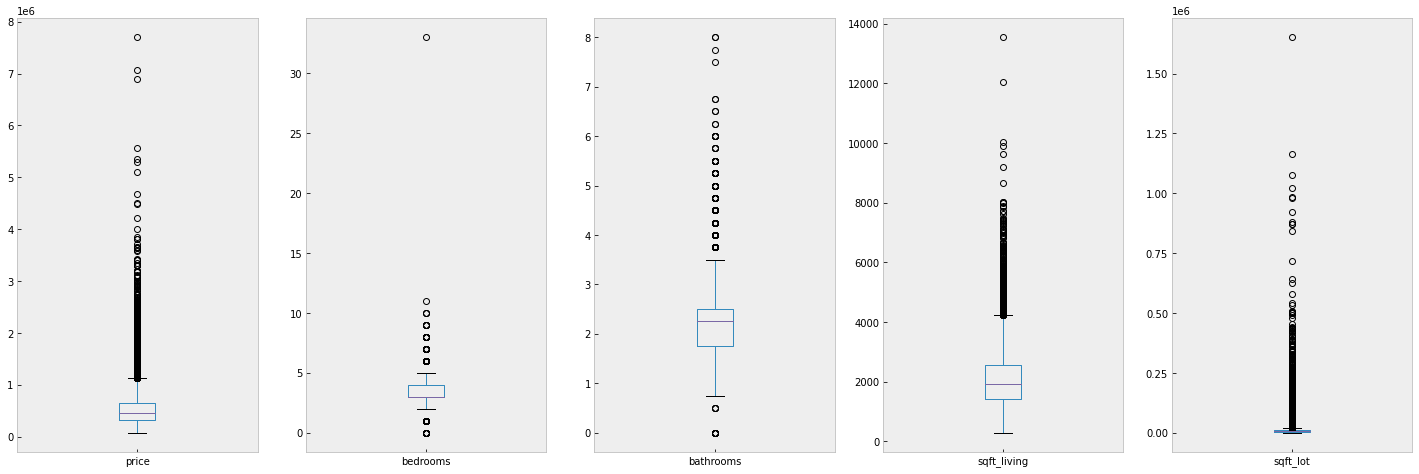

price has 406 outliers in total, which is 1.9% of data
bedrooms has 75 outliers in total, which is 0.35% of data
bathrooms has 187 outliers in total, which is 0.87% of data
sqft_living has 248 outliers in total, which is 1.1% of data
sqft_lot has 347 outliers in total, which is 1.6% of data


In [221]:
# OUTLIERS : Checking for Outliers by plotting a visual for our numeric data columns

#defining a funtion that takes the dataset name and numeric columns list as arguments 
#then returns a visual for the columns_list 
def outlier_visualiser(dataset_name, numeric_columns_list, width=25, height=8):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, grid=False)
        next_figure = next_figure + 1
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']    
outlier_visualiser(house, numeric_columns)

#counting number of outliers in our data columns and cheking the percentage for each
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
#counting number of outliers in our data columns and cheking the percentage for each using z-score
for col in numeric_columns:
    rows, columns = house.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(house[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

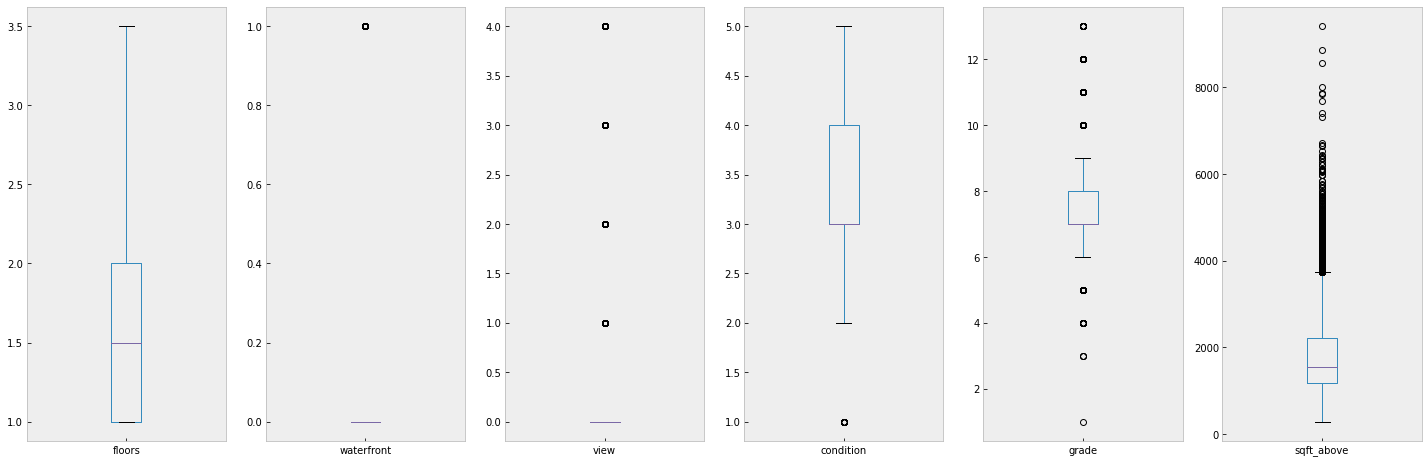

floors has 8 outliers in total, which is 0.037% of data
waterfront has 163 outliers in total, which is 0.75% of data
view has 829 outliers in total, which is 3.8% of data
condition has 30 outliers in total, which is 0.14% of data
grade has 136 outliers in total, which is 0.63% of data
sqft_above has 254 outliers in total, which is 1.2% of data


In [222]:
#defining a funtion that takes the dataset name and numeric columns list as arguments 
#then returns a visual for the columns_list 
def outlier_visualiser(dataset_name, numeric_columns_list, width=25, height=8):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, grid=False)
        next_figure = next_figure + 1
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
numeric_columns = ['floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above']    
outlier_visualiser(house, numeric_columns)

#counting number of outliers in our data columns and cheking the percentage for each
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
#counting number of outliers in our data columns and cheking the percentage for each using z-score
for col in numeric_columns:
    rows, columns = house.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(house[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

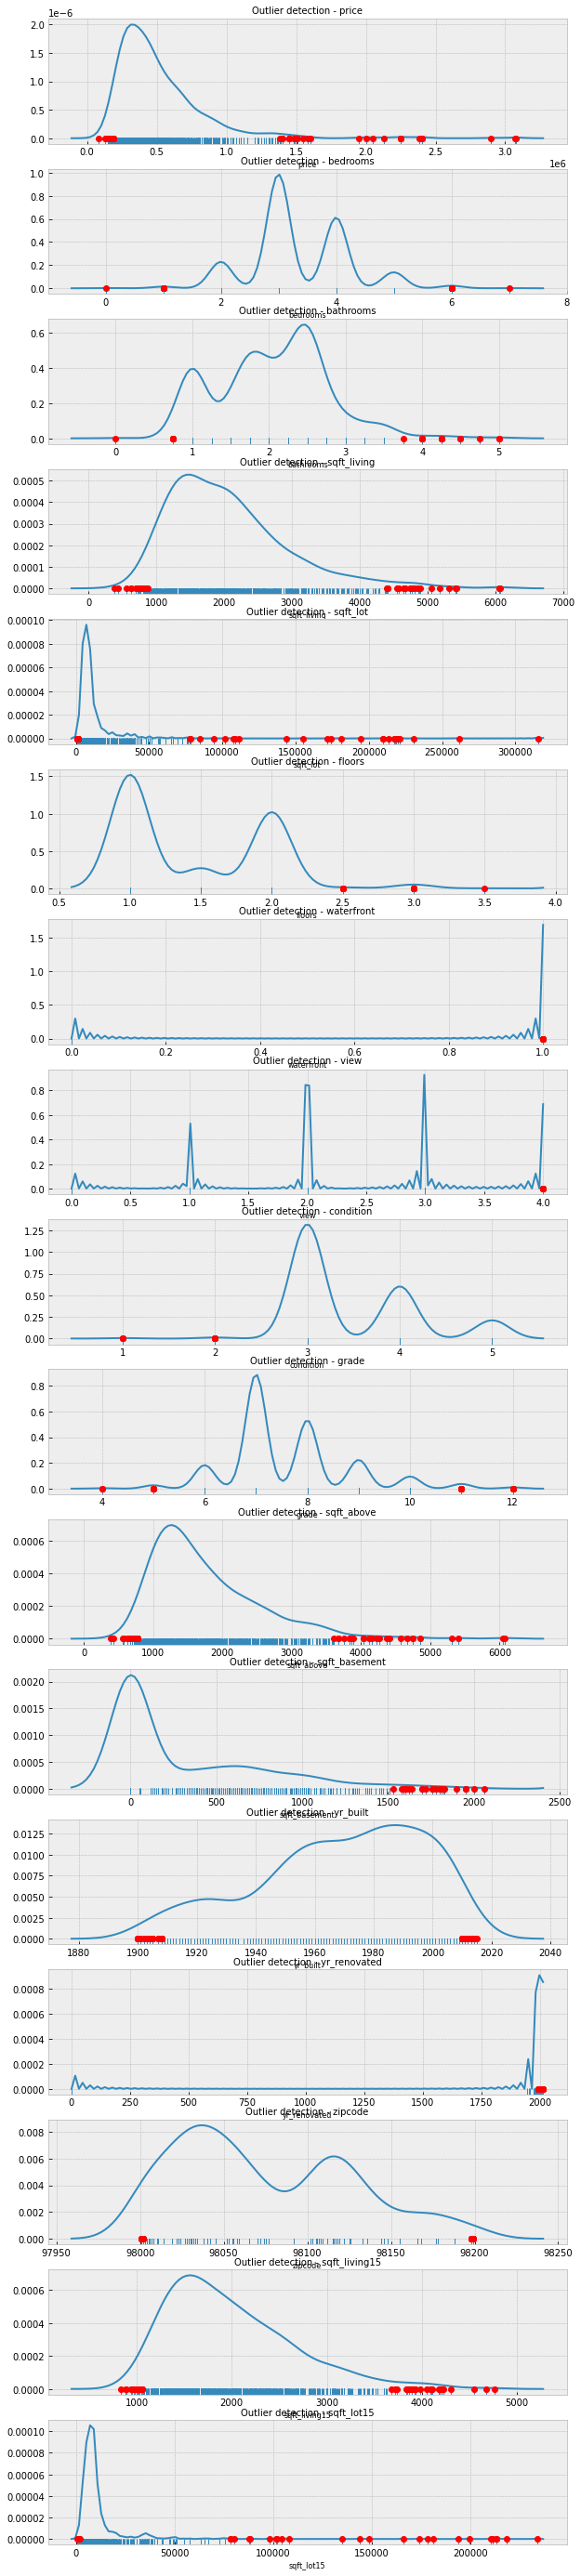

In [230]:
#Outlier detection using the percentiles

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(10,50))

for i, col_val in enumerate(col_names):
    y = house[col_val][:1000]
    sns.distplot(y, ax=ax[i], rug=True, hist=False)
    outliers = y[percentile_based_outlier(y)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

Most of our Data has inconsistencies and outliers but we will keep them for they are useful to us in our subsequent projects.

## c.Checking for Null values and duplicated columns

In [223]:
#Check for null values
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
#From the above observation we can notice that our data does not have null values

Find Duplicates in our data

In [225]:
house.duplicated().sum()

6

In [0]:
#We drop our duplicated rows

In [227]:
house.drop_duplicates

<bound method DataFrame.drop_duplicates of           price  bedrooms  bathrooms  ...  zipcode  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ...    98178           1340        5650
1      538000.0         3       2.25  ...    98125           1690        7639
2      180000.0         2       1.00  ...    98028           2720        8062
3      604000.0         4       3.00  ...    98136           1360        5000
4      510000.0         3       2.00  ...    98074           1800        7503
...         ...       ...        ...  ...      ...            ...         ...
21608  360000.0         3       2.50  ...    98103           1530        1509
21609  400000.0         4       2.50  ...    98146           1830        7200
21610  402101.0         2       0.75  ...    98144           1020        2007
21611  400000.0         3       2.50  ...    98027           1410        1287
21612  325000.0         2       0.75  ...    98144           1020        1357

[21613 rows x 17 col

In [228]:
house.duplicated().sum()

6

In [229]:
house.shape

(21613, 17)

# **4.Expoloratory Analysis**

## a. Univariate

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable

### i). Measures of Central Tendency

1. mean

In [231]:
print(f'The Mean of price of houses  is:\n {house.price.mean()}')
print(f'The Mean of number of bedrooms in this dataset is is:\n {house.bedrooms.mean()}')
print(f'The Mean of the number of bathrooms in this dataset is: \n{house.bathrooms.mean()}')
print(f'The Mean of the sizes of living rooms in Square feet  is: \n{house.sqft_living.mean()}')
print(f'The Mean of the sizes of the lot in Square feet  is:\n {house.sqft_lot.mean()}')
print(f'The Mean of the number of floors in this house dataset is: \n{house.floors.mean()}')
print(f'The Mean of the number of square feet is:\n {house.waterfront.mean()}')
print(f'The Mean of houses with a view is:\n {house.view.mean()}')
print(f'The Mean of houses with a condition is:\n {house.condition.mean()}')
print(f'The Mean of houses with  a grade is:\n {house.grade.mean()}')
print(f'The Mean of the above in Square feet is is:\n {house.sqft_above.mean()}')
print(f'The Mean of the sizes of  Basement in  square feet is:\n {house.sqft_basement.mean()}')
print(f'The Mean of the above in Square feet is is: \n{house.sqft_above.mean()}')
print(f'The Mean of the sizes of  Basement in  square feet is:\n {house.sqft_basement.mean()}')
print(f'The Mean of the Living room 15 in Square feet is is: \n{house.sqft_living15.mean()}')
print(f'The Mean of the sizes of  Lot 15 in  square feet is:\n {house.sqft_lot15.mean()}')



The Mean of price of houses  is:
 540182.1587933188
The Mean of number of bedrooms in this dataset is is:
 3.37084162309721
The Mean of the number of bathrooms in this dataset is: 
2.1147573219821405
The Mean of the sizes of living rooms in Square feet  is: 
2079.8997362698374
The Mean of the sizes of the lot in Square feet  is:
 15106.967565816869
The Mean of the number of floors in this house dataset is: 
1.4943089807060566
The Mean of the number of square feet is:
 0.007541757275713691
The Mean of houses with a view is:
 0.23430342849211122
The Mean of houses with a condition is:
 3.4094295100171195
The Mean of houses with  a grade is:
 7.656873178179799
The Mean of the above in Square feet is is:
 1788.3906907879516
The Mean of the sizes of  Basement in  square feet is:
 291.5090454818859
The Mean of the above in Square feet is is: 
1788.3906907879516
The Mean of the sizes of  Basement in  square feet is:
 291.5090454818859
The Mean of the Living room 15 in Square feet is is: 
1986

2. Median

In [232]:
print(f'The Median of price is: \n {house.price.median()}')
print(f'The Median of number of bedrooms is: \n {house.bedrooms.median()}')
print(f'The Median of number of bathrooms is: \n {house.bathrooms.median()}')
print(f'The Median of the size of Living rooms in square feet is: \n {house.sqft_living.median()}')
print(f'The Median of the size of Lot in square feet is is: \n {house.sqft_lot.median()}')
print(f'The Median of number of floors is: \n {house.floors.median()}')
print(f'The Median of whether a house has a waterfront is: \n {house.waterfront.median()}')
print(f'The Median of the above in square feet is: \n {house.sqft_above.median()}')
print(f'The Median of the basement in squarefeet  is: \n {house.sqft_basement.median()}')
print(f'The Median of the Living 15 in Square feet is is: \n {house.sqft_living15.median()}')
print(f'The Median of Lot 15 in Square feet  is: \n {house.sqft_lot15.median()}')

The Median of price is: 
 450000.0
The Median of number of bedrooms is: 
 3.0
The Median of number of bathrooms is: 
 2.25
The Median of the size of Living rooms in square feet is: 
 1910.0
The Median of the size of Lot in square feet is is: 
 7618.0
The Median of number of floors is: 
 1.5
The Median of whether a house has a waterfront is: 
 0.0
The Median of the above in square feet is: 
 1560.0
The Median of the basement in squarefeet  is: 
 0.0
The Median of the Living 15 in Square feet is is: 
 1840.0
The Median of Lot 15 in Square feet  is: 
 7620.0


### ii).Min , max , Range and Interquartiles

price

In [233]:
#price
#price minimum
price_min = house['price'].min()
print('The price_min is :',price_min)

#price maximum
price_max =house['price'].max()
print('The price is:',price_max)

#Calculating the Range of price
print('The range of price is :',price_max - price_min)

# upper Quantile

q1 =house['price'].quantile(0.25)

#Lower Quantile
q3 =house['price'].quantile(0.75)

#interquantile range of  price

print('The interquartile range of price is:',(q3-q1)/2)


The price_min is : 75000.0
The price is: 7700000.0
The range of price is : 7625000.0
The interquartile range of price is: 161525.0


bedrooms

In [234]:
#bedrooms minimum
bedrooms_min = house['bedrooms'].min()
print('The bedrooms minimum number is :',bedrooms_min)

#bedrooms maximum
bedrooms_max =house['bedrooms'].max()
print('The bedrooms maximum number is:',bedrooms_max)

#Calculating the Range of bedrooms
print('The range of bedrooms is :',bedrooms_max - bedrooms_min)

# upper Quantile

q1 =house['bedrooms'].quantile(0.25)

#Lower Quantile
q3 =house['bedrooms'].quantile(0.75)

#interquantile range of  bedrooms

print('The interquartile range of bedrooms is:',(q3-q1)/2)


The bedrooms minimum number is : 0
The bedrooms maximum number is: 33
The range of bedrooms is : 33
The interquartile range of bedrooms is: 0.5


Bathrooms

In [235]:
#bathrooms minimum
bathrooms_min = house['bathrooms'].min()
print('The bathrooms minimum number is :',bathrooms_min)

#bathrooms maximum
bathrooms_max =house['bathrooms'].max()
print('The bathrooms maximum number is:',bathrooms_max)

#Calculating the Range of bathrooms
print('The range of bathrooms is :',bathrooms_max - bathrooms_min)

# upper Quantile

q1 =house['bathrooms'].quantile(0.25)

#Lower Quantile
q3 =house['bathrooms'].quantile(0.75)

#interquantile range of  bathrooms

print('The interquartile range of bathrooms is:',(q3-q1)/2)


The bathrooms minimum number is : 0.0
The bathrooms maximum number is: 8.0
The range of bathrooms is : 8.0
The interquartile range of bathrooms is: 0.375


sqft_living

In [236]:
#sqft_living minimum
sqft_living_min = house['sqft_living'].min()
print('The sqft_living minimum number is :',sqft_living_min)

#sqft_living maximum
sqft_living_max =house['sqft_living'].max()
print('The sqft_living maximum number is:',sqft_living_max)

#Calculating the Range of sqft_living
print('The range of sqft_living is :',sqft_living_max - sqft_living_min)

# upper Quantile

q1 =house['sqft_living'].quantile(0.25)

#Lower Quantile
q3 =house['sqft_living'].quantile(0.75)

#interquantile range of  sqft_living

print('The interquartile range of sqft_living is:',(q3-q1)/2)


The sqft_living minimum number is : 290
The sqft_living maximum number is: 13540
The range of sqft_living is : 13250
The interquartile range of sqft_living is: 561.5


floors

In [237]:
#floors minimum
floors_min = house['floors'].min()
print('The floors minimum number is :',floors_min)

#floors maximum
floors_max =house['floors'].max()
print('The floors maximum number is:',floors_max)

#Calculating the Range of floors
print('The range of floors is :',floors_max -floors_min)

# upper Quantile

q1 =house['floors'].quantile(0.25)

#Lower Quantile
q3 =house['floors'].quantile(0.75)

#interquantile range of floors

print('The interquartile range of floors is:',(q3-q1)/2)


The floors minimum number is : 1.0
The floors maximum number is: 3.5
The range of floors is : 2.5
The interquartile range of floors is: 0.5


sqft_basement

In [238]:
#sqft_basement minimum
sqft_basement_min = house['sqft_basement'].min()
print('The sqft_basement minimum number is :',sqft_basement_min)

#sqft_basement maximum
sqft_basement_max =house['sqft_basement'].max()
print('The sqft_basement maximum number is:',sqft_basement_max)

#Calculating the Range of sqft_basement
print('The range of sqft_basement is :',sqft_basement_max - sqft_basement_min)

# upper Quantile

q1 =house['sqft_basement'].quantile(0.25)

#Lower Quantile
q3 =house['sqft_basement'].quantile(0.75)

#interquantile range of sqft_basement

print('The interquartile range of sqft_basement is:',(q3-q1)/2)


The sqft_basement minimum number is : 0
The sqft_basement maximum number is: 4820
The range of sqft_basement is : 4820
The interquartile range of sqft_basement is: 280.0


sqft_basement

In [239]:
#sqft_basement minimum
sqft_basement_min = house['sqft_basement'].min()
print('The sqft_basement minimum number is :',sqft_basement_min)

#sqft_basement maximum
sqft_basement_max =house['sqft_basement'].max()
print('The sqft_basement maximum number is:',sqft_basement_max)

#Calculating the Range of sqft_basement
print('The range ofsqft_basement is :',sqft_basement_max - sqft_basement_min)

# upper Quantile

q1 =house['sqft_basement'].quantile(0.25)

#Lower Quantile
q3 =house['sqft_basement'].quantile(0.75)

#interquantile range of  sqft_basement

print('The interquartile range of sqft_basement is:',(q3-q1)/2)


The sqft_basement minimum number is : 0
The sqft_basement maximum number is: 4820
The range ofsqft_basement is : 4820
The interquartile range of sqft_basement is: 280.0


### iii).Bar plots

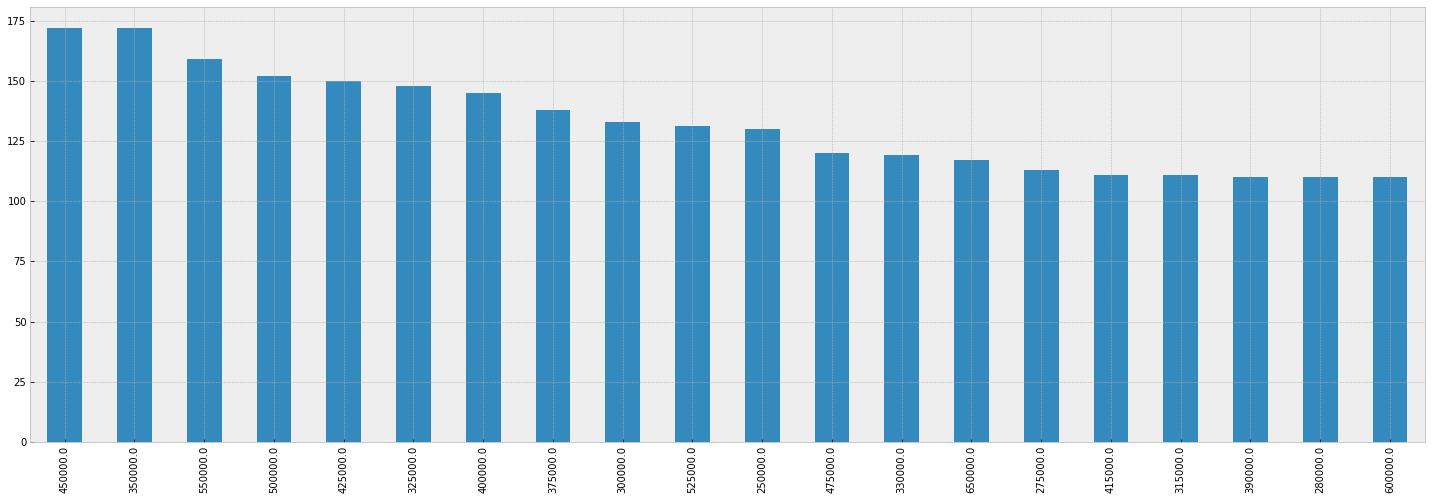

In [240]:
house['price'].value_counts().head(20).plot.bar()



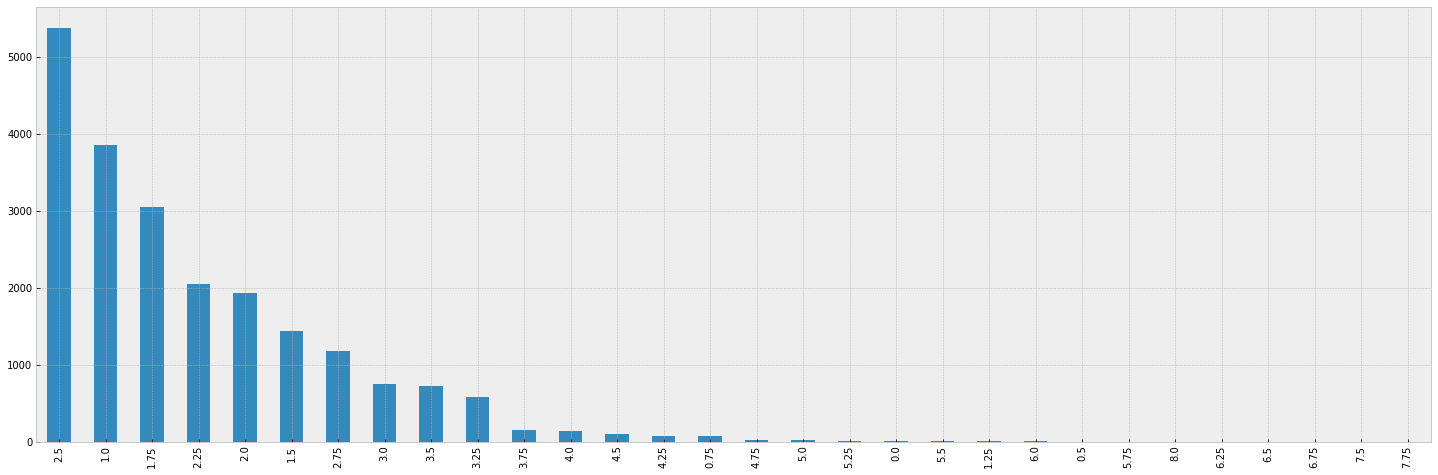

In [241]:
house['bathrooms'].value_counts().plot.bar()

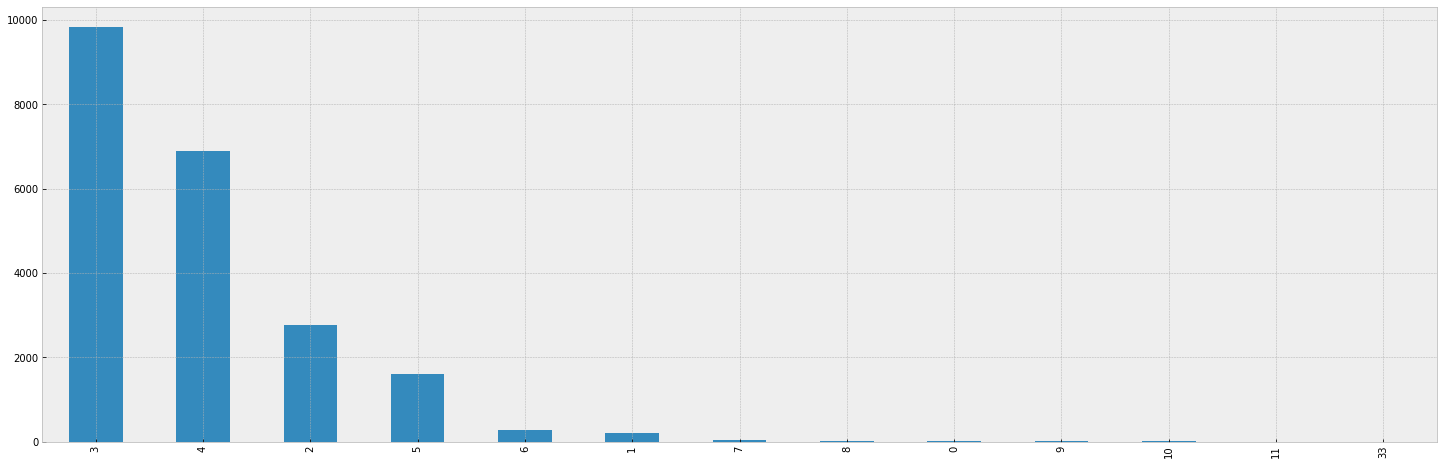

In [242]:
house['bedrooms'].value_counts().plot.bar()

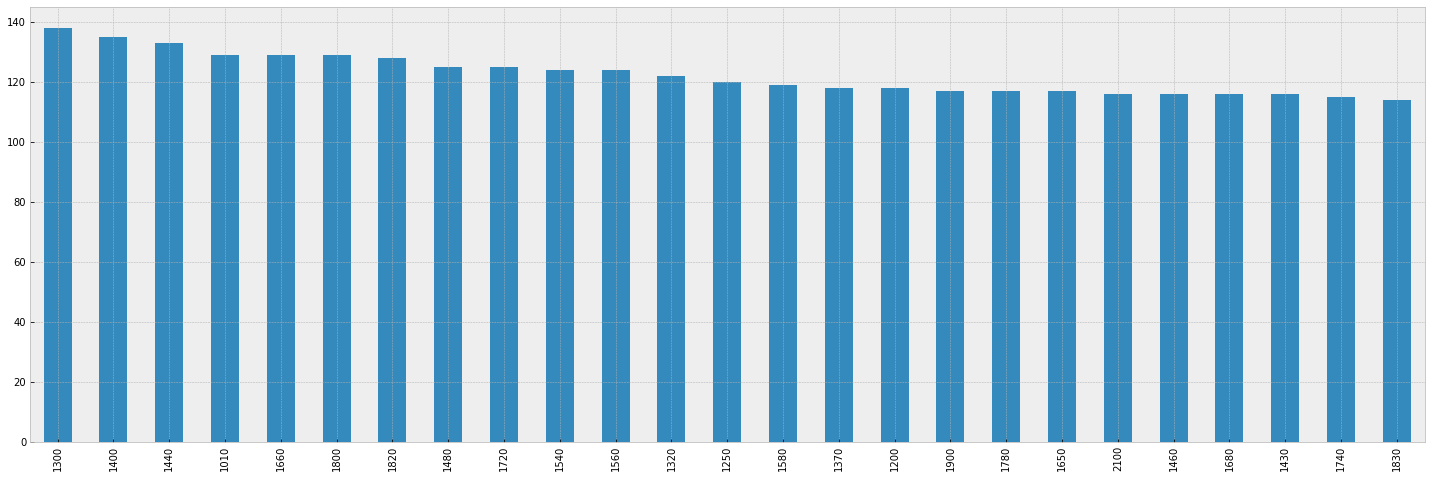

In [243]:
house['sqft_living'].value_counts().head(25).plot.bar()

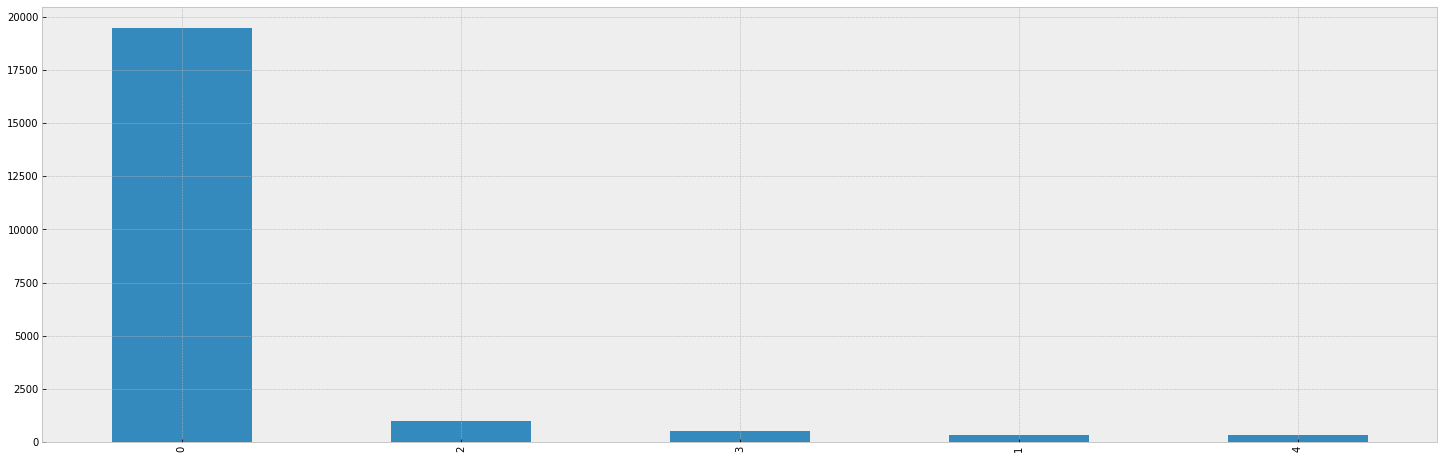

In [244]:
house['view'].value_counts().plot.bar()

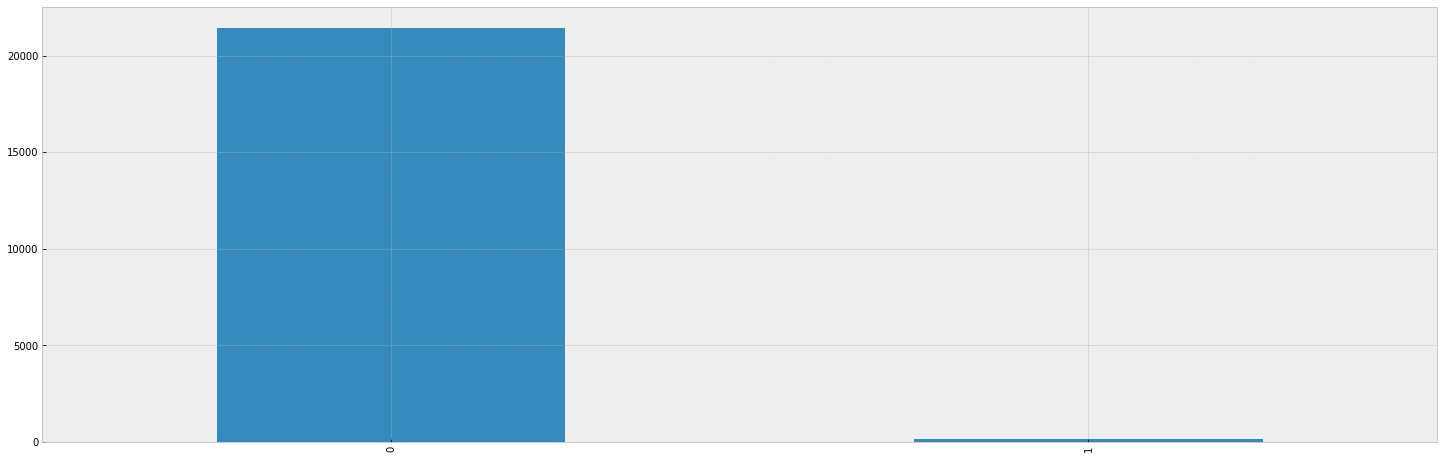

In [245]:
house['waterfront'].value_counts().plot.bar()

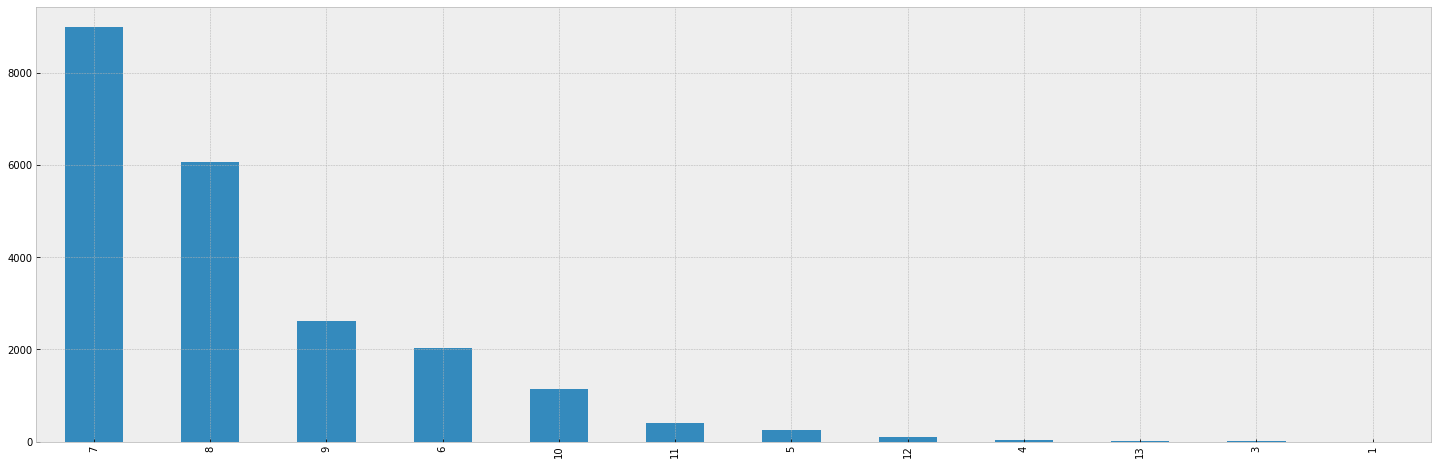

In [246]:
house['grade'].value_counts().plot.bar()

## b.Bivariate

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

### i).Correlation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related

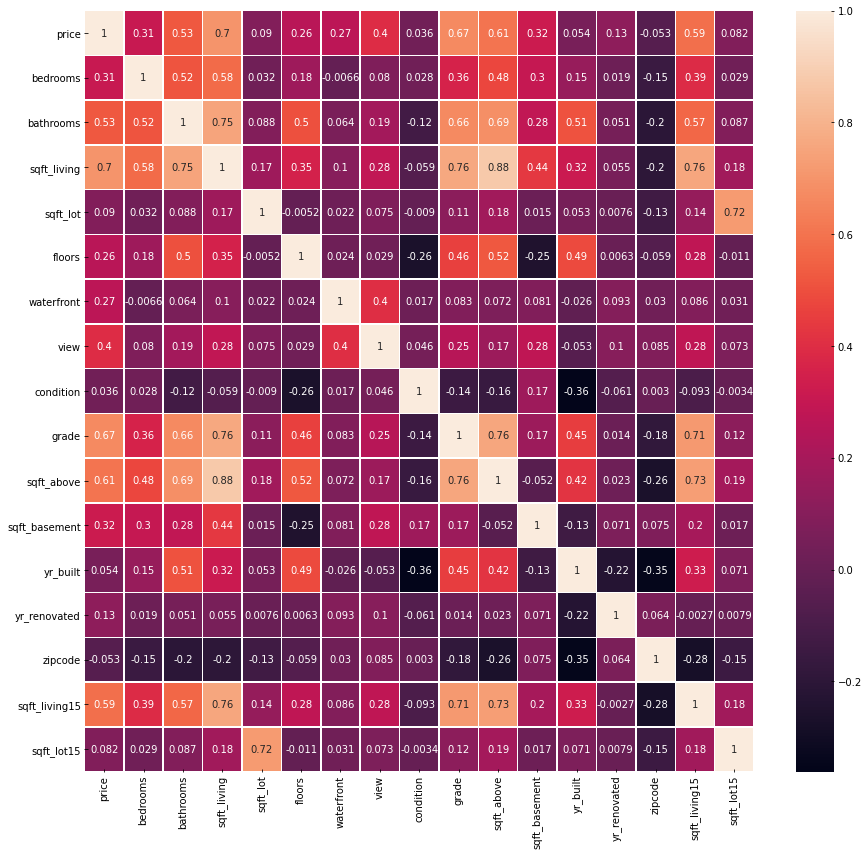

In [247]:
# Create a correlation matrix
corrMatrix = house.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,14)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

-From the Correlation matrix above, we check for the highest correlated variable with price.

-Grade, Sqft_living15 and Sqft_above have the highest positive correlation with 0.67, 0.61 and 0.51.



In [0]:
cols =['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_lot15', 'sqft_basement']

### ii).pairplots

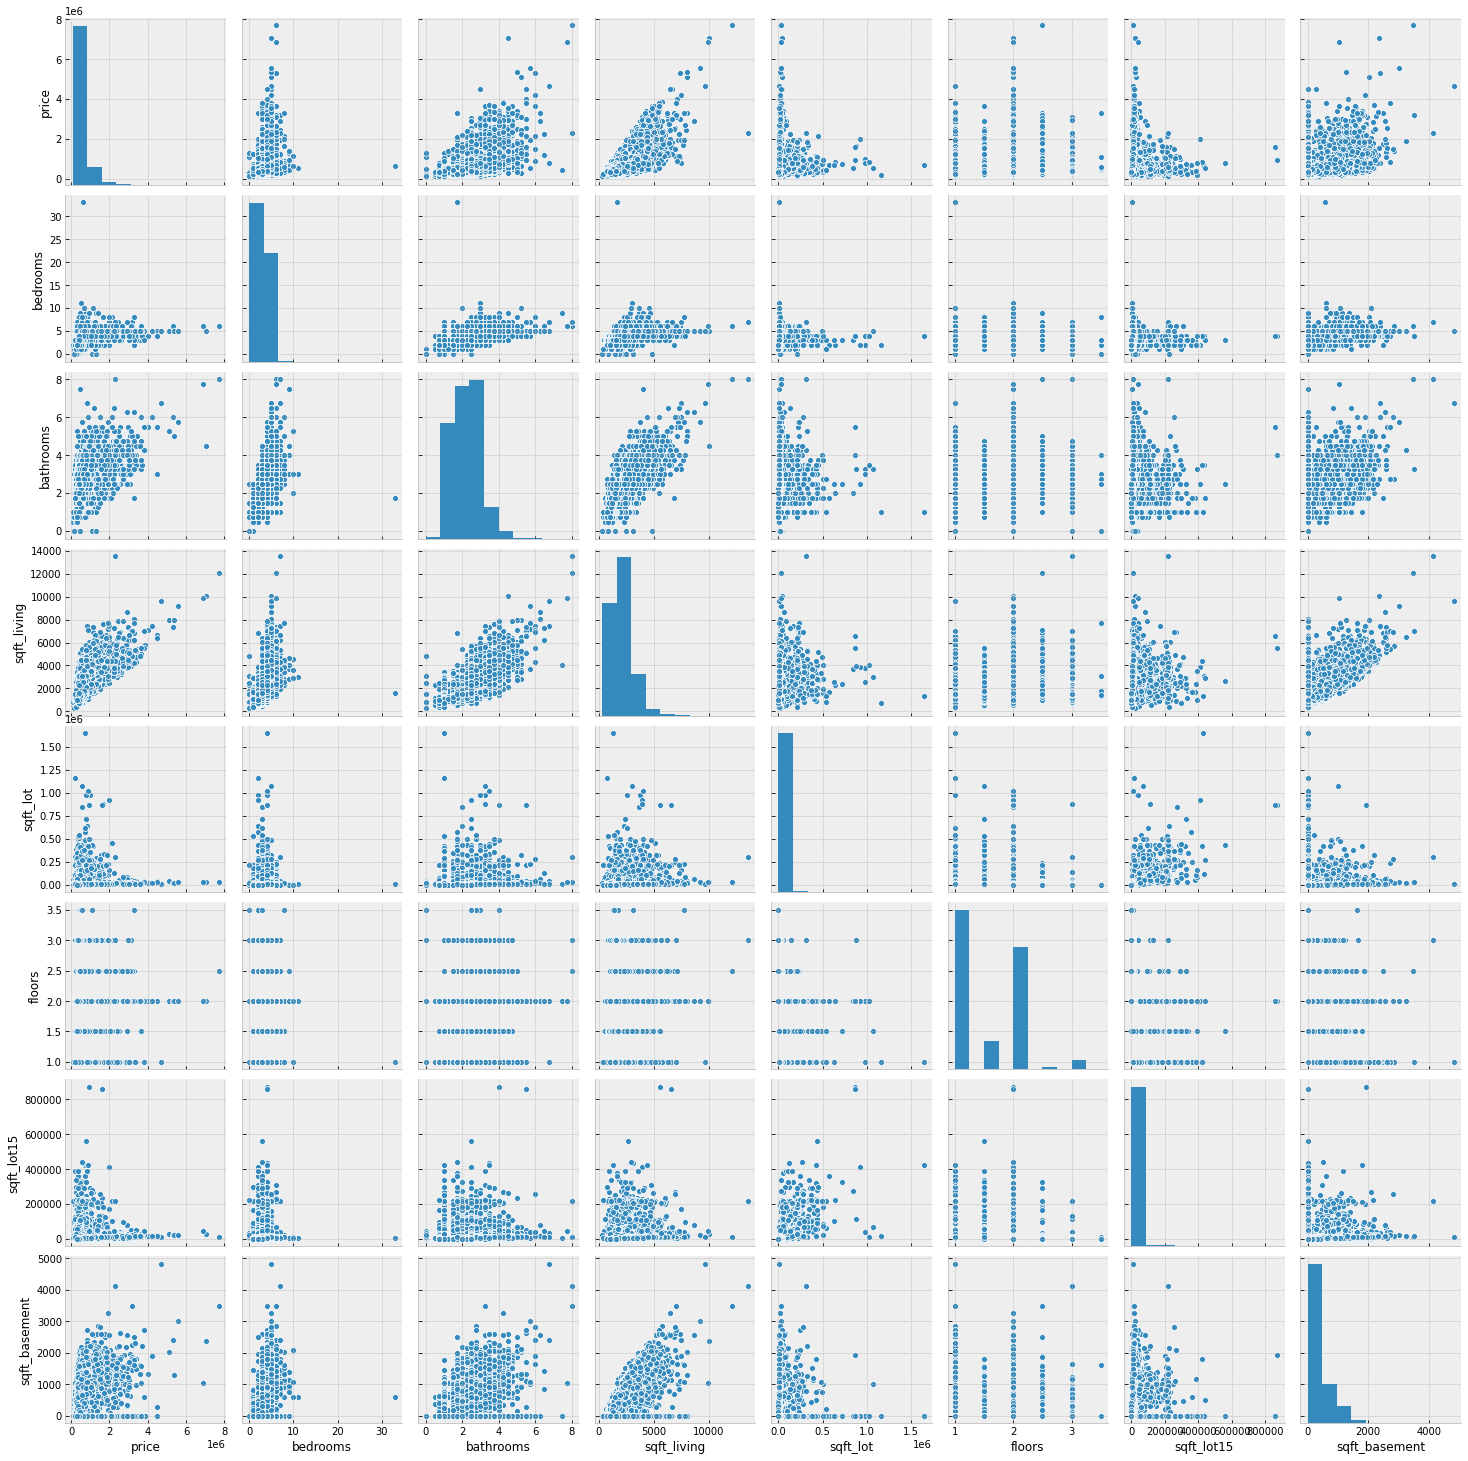

In [249]:
# drawing scatter plots on numeric variables to visualize any correlation
sns.pairplot(house[cols])

This plots will aid while doing Regrressions by knowing the relationships between different variables.

## c.Multivariate Analysis

Is used to understand and reduce the data dimensions by analysing the data covariance structure.

In [0]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [0]:
 #Before we start on Linear regression ,we split our variables into X and y variables
 X = house.drop(columns = 'price')
 y = house['price']

In [368]:
reg = linear_model.LinearRegression()
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size =0.3 , random_state =0)
reg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [369]:
reg.score(X_test , y_test)

0.33892925422038345

The accuracy  is at around 33% with all the information present

Observing PCA on the dataset

In [0]:
pca = PCA(n_components = 10 , whiten= 'True')
x = pca.fit(X).transform(X)

In [376]:
pca.explained_variance_

array([8.27462949e+18, 2.13312826e+09, 2.83820098e+08, 1.68467703e+06,
       2.78792405e+05, 1.68448478e+05, 1.48055687e+05, 2.59848009e+03,
       5.94942561e+02, 6.28923452e-01])

In [377]:
reg = linear_model.LinearRegression()
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size =0.3 , random_state =0)
reg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [379]:
independent_only.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [378]:
reg.score(X_test, y_test)

0.6878783608645636

By reducing our features to 10 variables, we geta percentage increase of accuracy to 68.7 percent

# **5. Mutiple Linear Regression**

What is Linear Regression?


---


Linear regression is a linear approach to modeling the relationship between a scalar response (dependent variable) and one or more explanatory variables (independent variables).

We will use both Sklearn and Statsmodels in our linear regression analysis.


---


## 1.**Using Scikit-learn**

In [0]:
#We will first import the Linear Regression 
from sklearn.linear_model import LinearRegression

In [0]:
#We then create an instance of linear regression.
lr = LinearRegression()

In [253]:
#Fit the X and y values
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
lr.coef_

array([-3.93637936e+04,  4.57649139e+04,  1.09361251e+02, -2.27899122e-03,
        2.70295472e+04,  5.79086615e+05,  4.33511765e+04,  1.94591801e+04,
        1.19860094e+05,  5.14941409e+01,  5.78671096e+01, -3.57777394e+03,
        1.01196744e+01, -6.77222924e+00,  2.47250010e+01, -5.51010532e-01])

since we have 18 features, their respective coefficients are as shown above.

In [255]:
lr.intercept_
#The intercept here is not almost out of context

6873770.779977548

From SKlearn we do not get how good or bad our Linear Model is. Hence we will now use Stats Models API that will give more comprehensive Summaries that we can make meaningful conclusions about the House dataset

## **2. Using Statsmodels**

In [0]:
#Import our dependencies
import statsmodels.api as sm
from scipy import stats

In [0]:
X = sm.add_constant(X)
model =sm.OLS(y, X)

In [258]:
#We determine the constant value and the coefficients for each variiable.
results = model.fit()
results.params
#The intercept here is a constant of 6.676 which is  more accurate and not out of context.

const            6.873771e+06
bedrooms        -3.936379e+04
bathrooms        4.576491e+04
sqft_living      1.093617e+02
sqft_lot        -2.278991e-03
floors           2.702955e+04
waterfront       5.790866e+05
view             4.335118e+04
condition        1.945918e+04
grade            1.198601e+05
sqft_above       5.149372e+01
sqft_basement    5.786669e+01
yr_built        -3.577774e+03
yr_renovated     1.011967e+01
zipcode         -6.772229e+00
sqft_living15    2.472500e+01
sqft_lot15      -5.510105e-01
dtype: float64

In [259]:
#Let us obtain the Summaryt of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2719.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:06:16   Log-Likelihood:            -2.9616e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21597   BIC:                         5.925e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.874e+06   3.13e+06      2.196

***Interprating the Summaries Table***

1. **R-Squared value** - (Coefficient of Determination) - Is the proportion of  the dependent variable that is predictable from the Independent variable.

NB - If your Linear regression is fit really well , then you will have an R- squared Value that is closer to 1.

For instance ours is 0.7 ,which is close to 1 hence is almost a fit

2. **Adjusted R- squared** accounts for this by penalising R - squared values that include non - useful predictors in our model. 

i.e if an adjusted R- squared is much lesser than R-Squared value ,its a sign that a variable might not be relevant to our overall model.

In our  model , we have  the same R Squared of **0.7** and adjusted R squared  of **0.7** which means we may not  have varables that do not aid in our predictions.

3.  **F- Statistic** or the **F- test** is used  in assessing the significance of the overall regression model.

in mutiple regression, where you have mutiple features , F - test compares the model with no of predictors , in our case the independent variables labelled Independent only.

THere are 2 models: one with The Intercept only and another with  the intercept and the independent variables.

The null Hypothesis in the case of F- Statistic is that these 2 models are equal.

The alternative Hypothesis is that the Intercept only Model is worse than our model

We get a P-value as well as a statistic valuethat helps one to choose whether to reject or accept the null hypothesis.

Checking on our **Prob(F-Statistic)** which is equal to zero ,  and our F- statistic value is really large , We reject the Null hypothesis.


This means that there is evidence that there is a good amountof  linear relationship between the independent variables and the dependent variable.


The coefficients and Standard error help determine if there is **Multicollinearity** in the variables and which variables are actually relevant to our model.(We will check multicollinearity in detail below)


Inorder to infer if a feature is significant or relevant to the target variable, we perform a **T-test**

The T-Test look at the relationship between the  target variable and every predictor variable  independently without taking into accunt all features at once. ie feature1 and target column , feature2 and target column and so on.

THe null hypothesis of a particular feature is that feature 1 is equal to zero and the alternate hypothesis is that the feature coefficient vslue is not equal to zero.


We have the T- values for each variable and a corresponding  p-value associated with the t-test. THe higher thr t-value, the greater the chances you reject  the null hypothesis and accept the alternative hypothesis.

The lower the value of P, signifies you reject null and accept alternative hypothesis.




## *a.Multicollinearity and VIF*

What is Multicollinearity? -
1. Correlations or mutiple correlations of sufficient magnitude to have the potential to adversely affect regression estimates.

---

2. Is a state of very high intercorrelations or inter - associations among independent variables

Why is detecting multicollinearity important?

The R² values will be large in the mutilpe regression analysis but none of the individual Beta weights will be statistically significant

May lead to wrong predictions



In [0]:
#Import our dependencies
import statsmodels.api as sm
from scipy import stats

In [0]:
#We will split the House Dataset into Features and Label or Independent(X) and dependent(y) variables.
independent_only = house.drop(columns = 'price')

In [325]:
independent_only.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
names = house.columns

We will calculate VIF (Variance Inflation Factor) which is used for detecting   multicollinearity in python.

VIF = 1/(1-R²)

In [0]:
#This is used to import linearregression model
from sklearn.linear_model import LinearRegression


Using the Stats models API which gives more information than that of SKlearn ,We will try to get an adjusted R-value  and a Summary to all our independent variables

In [265]:
for i in range(0 , len(house.columns)):
 X = house.drop(columns = 'price')
 y = house['price']
X1 =sm.add_constant(X)
model= sm.OLS(y,X1)
#rsquared = multi_lingreg.score(x,y)
results = model.fit()
results.summary()

  
 # rsq = results.rsquared
  #vif = round(1(1-rsq),2)
  #print( 'R squared Value of {} column is {} keeping all columns as features'.format(names[i], (round(rsq , 2))))
 # print('Variance Inflation Factor of {} column is {} \n '.format(names[i] , vif))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2719.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:06:16   Log-Likelihood:            -2.9616e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21597   BIC:                         5.925e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.874e+06   3.13e+06      2.196      0.028    7.37e+05     1.3e+07
bedrooms      -3.936e+04   2031.206    -19.380      0.000   -4.33e+04   -3.54e+04
bathrooms      4.576e+04   3494.474     13.096      0.000    3.89e+04    5.26e+04
sqft_living     109.3617      2.438     44.849      0.000     104.582     114.141
sqft_lot         -0.0023      0.051     -0.044      0.965      -0.103       0.098
floors         2.703e+04   3837.878      7.043      0.000    1.95e+04    3.46e+04
waterfront     5.791e+05   1.86e+04     31.052      0.000    5.43e+05    6.16e+05
view           4.335e+04   2286.907     18.956      0.000    3.89e+04    4.78e+04
condition      1.946e+04   2523.077      7.712      0.000    1.45e+04    2.44e+04
grade          1.199e+05   2256.109     53.127      0.000    1.15e+05    1.24e+05
sqft_above       51.4937      2.371     21.717      0.000      46.846      56.141
sqft_basement    57.8667      2.806     20.620      0.000      52.366      63.367
yr_built      -3577.7739     74.655    -47.924      0.000   -3724.104   -3431.444
yr_renovated     10.1197      3.922      2.580      0.010       2.432      17.808
zipcode          -6.7722     31.418     -0.216      0.829     -68.354      54.810
sqft_living15    24.7250      3.654      6.766      0.000      17.562      31.888
sqft_lot15       -0.5510      0.078     -7.024      0.000      -0.705      -0.397
==============================================================================
Omnibus:                    16306.063   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1187684.598
Skew:                           3.024   Prob(JB):                         0.00
Kurtosis:                      38.809   Cond. No.                     4.82e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.42e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
correlations = independent_only.corr()

In [267]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.649619,-0.460014,-1.907345e-01,0.048604,0.053353,0.062471,0.108037,-0.053487,0.316909,-7.052488e-01,-3.895697e-01,0.126876,0.044082,0.084901,0.033630,0.085710
bathrooms,-0.460014,3.347965,-5.059371e+00,-0.018698,-0.683764,0.009317,-0.039806,-0.134767,-0.289654,3.305491e+00,1.353335e+00,-0.911680,-0.256777,0.011419,0.098934,0.077132
sqft_living,-0.194663,-5.066610,-3.387473e+13,-0.131612,0.530923,0.454840,-0.593383,-0.365610,-0.755832,3.054236e+13,1.632343e+13,1.629499,0.060733,-0.091544,-1.006194,-0.197970
sqft_lot,0.048604,-0.018698,-1.313188e-01,2.091007,0.061872,0.028865,-0.058575,0.027571,-0.013022,-1.122505e-01,3.429446e-02,0.050821,0.015779,0.061401,0.142560,-1.472141
floors,0.053353,-0.683764,5.279945e-01,0.061872,1.985198,-0.006595,-0.034698,0.096690,-0.297435,-9.337447e-01,3.402139e-01,-0.407535,-0.071362,-0.263724,0.292938,0.089919
waterfront,0.062471,0.009317,4.551619e-01,0.028865,-0.006595,1.203243,-0.494809,-0.013179,0.046323,-5.189314e-01,-2.245634e-01,-0.016195,-0.065000,0.014119,0.060892,-0.016321
view,0.108037,-0.039806,-5.933477e-01,-0.058575,-0.034698,-0.494809,1.419601,-0.027794,-0.168455,5.711458e-01,3.143831e-02,0.141992,-0.042574,-0.141551,-0.299806,-0.004084
condition,-0.053487,-0.134767,-3.660788e-01,0.027571,0.096690,-0.013179,-0.027794,1.246040,-0.036290,3.755506e-01,8.340456e-02,0.544389,0.204148,0.178503,0.080657,-0.030369
grade,0.316909,-0.289654,-7.510581e-01,-0.013022,-0.297435,0.046323,-0.168455,-0.036290,3.250774,-8.164860e-01,-1.758376e-01,-0.455594,-0.048343,-0.145394,-0.865206,0.113886
sqft_above,-0.703529,3.310296,3.054236e+13,-0.111971,-0.935924,-0.518632,0.571046,0.375155,-0.811847,-2.753782e+13,-1.471765e+13,-1.082839,-0.071832,0.181116,-0.679070,-0.031170


In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
X = house.drop(columns = 'price')
y = house['price']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


######################################






,Actual,Predicted
21490,529000.0,7.145182e+05
18181,262500.0,1.797573e+05
4610,245000.0,2.683647e+05
8731,479500.0,3.146211e+05
9437,375500.0,4.310803e+05
...,...,...
17914,291750.0,4.080412e+05
3665,435000.0,2.606372e+05
1389,275000.0,3.507364e+05
18088,455000.0,2.745711e+05


In [275]:
# This is our prediction for admission based on our model
x_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(x_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

3940.9238169454693

In [271]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 138572.12672486686
Mean Squared Error: 39904035232.4628
Root Mean Squared Error: 199759.94401396593


## *b.Bartlett's Test*

**Bartlett's test** is a Scipy module.It was developed by Maurice Stevenson Bartlett. It tests the Null hypoyhesis all input samples are from populations with equal variances.

Simply it is a statistical procedure for testing if K population samlples have equal variances

In [276]:
#We will import Scipy 
import scipy as sp

test_result, p_value = sp.stats.bartlett(x_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(x_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

1.8478803413001142e-163
the variances are homogeneous!


In [0]:
feature_names = independent_only

In [347]:
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
plt.figure(figsize = (15,10))
importance = model.coef_
#Plot feature importance
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()

# **6. Quantile Regression**

**Quantile regression** is an extension of linear regression that is used when the conditions of linear regression are not met (i.e., linearity, homoscedasticity, independence, or normality).

Quantile Regression makes 

In [0]:
#We will start by visualising the independent variables 

1. Scatter plots

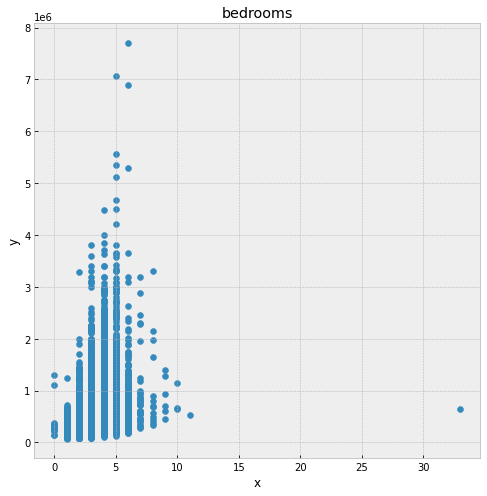

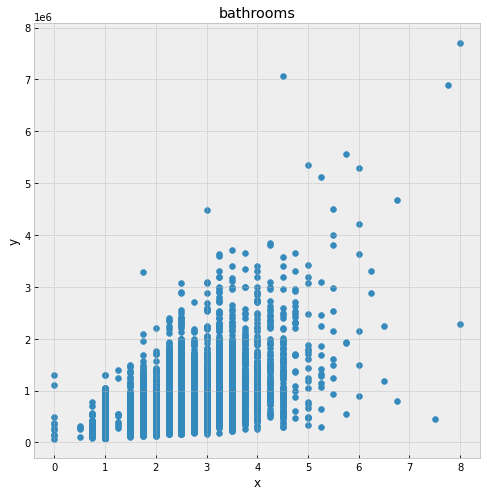

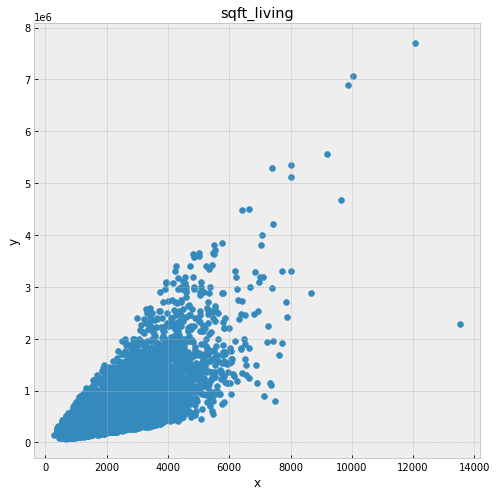

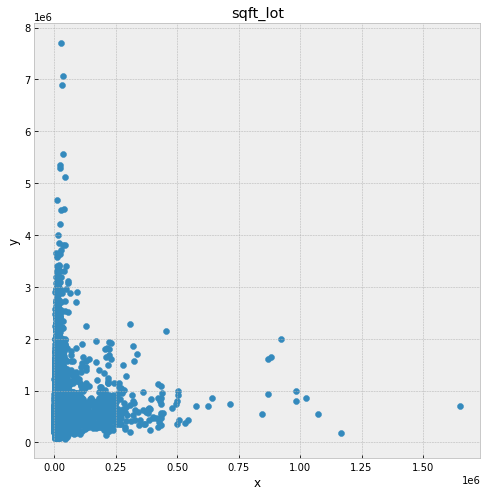

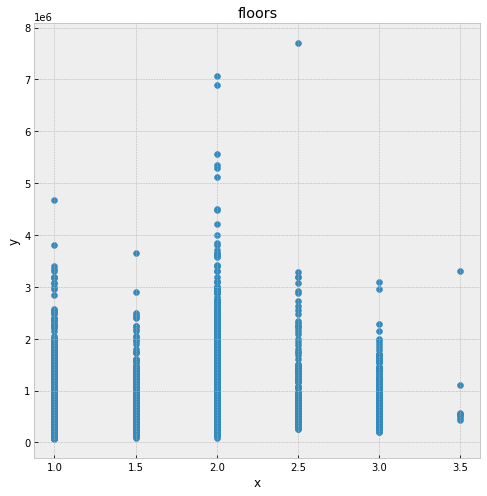

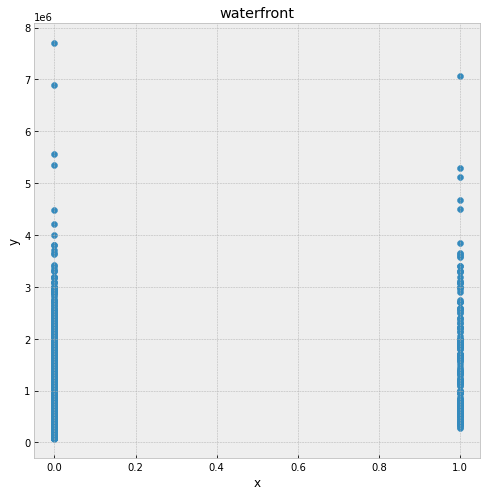

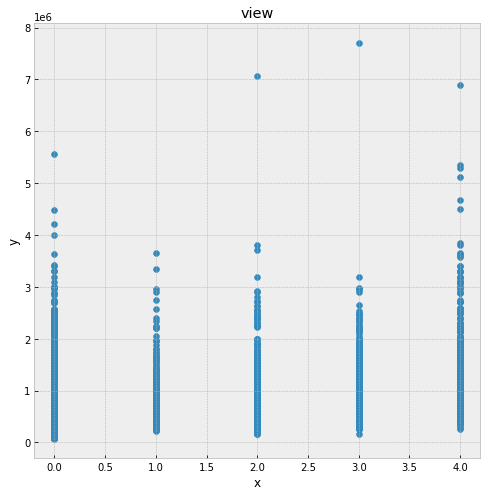

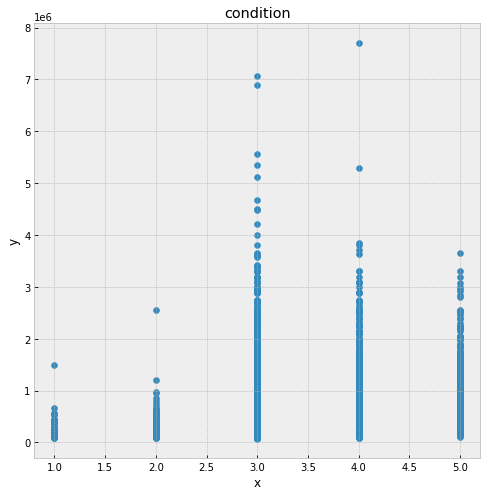

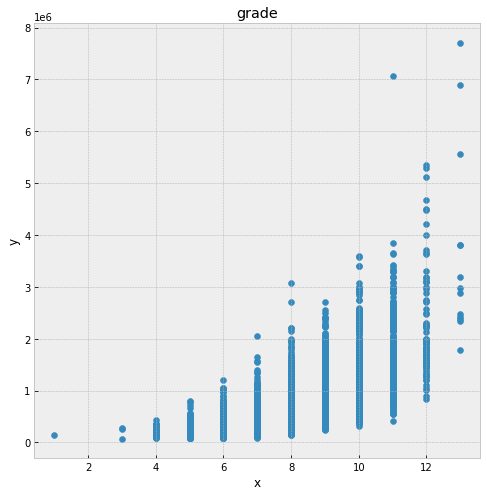

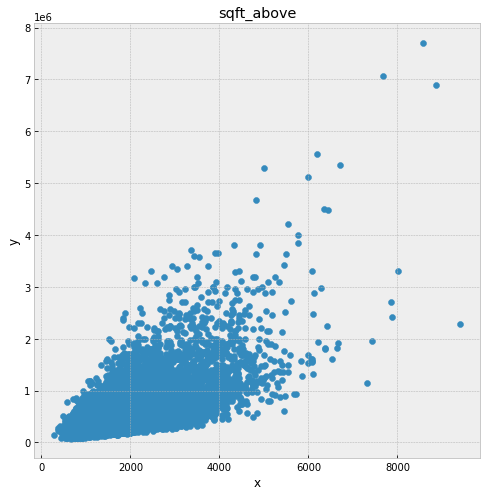

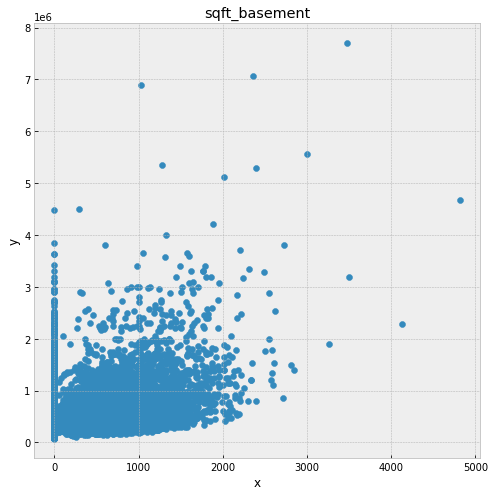

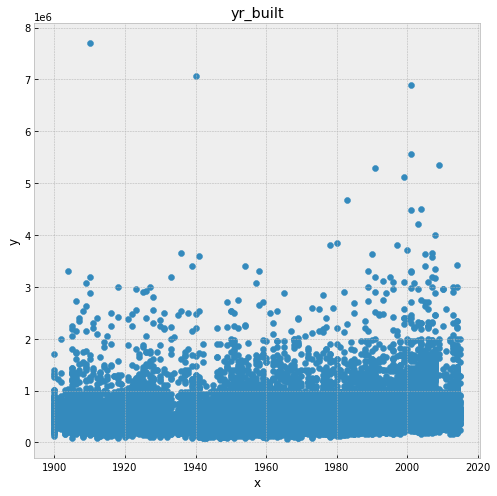

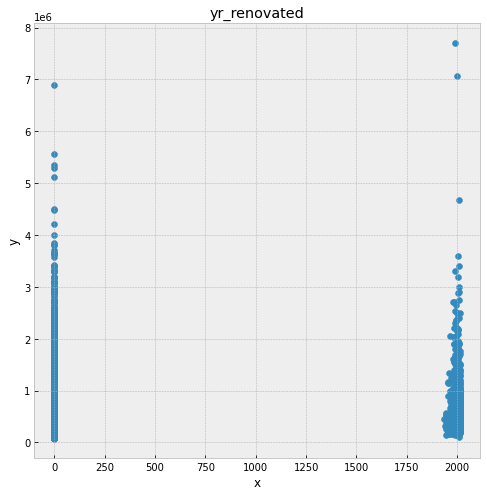

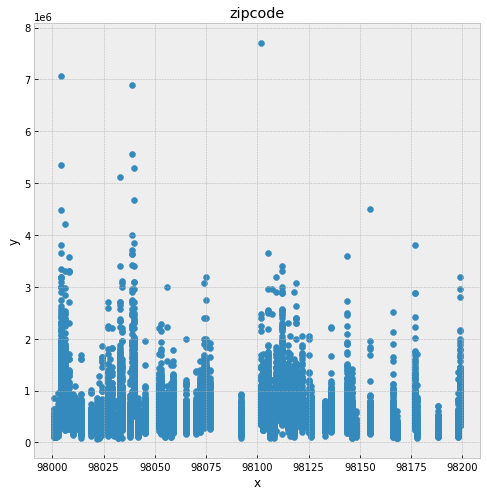

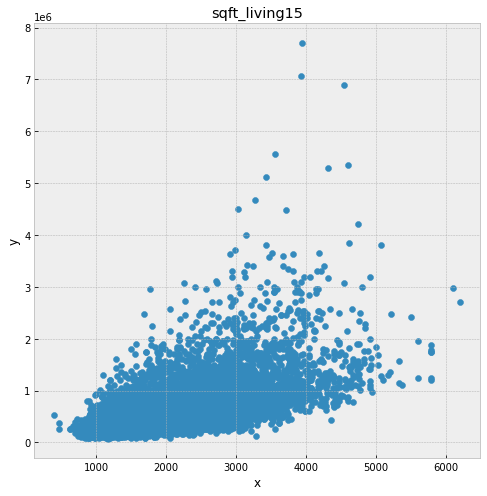

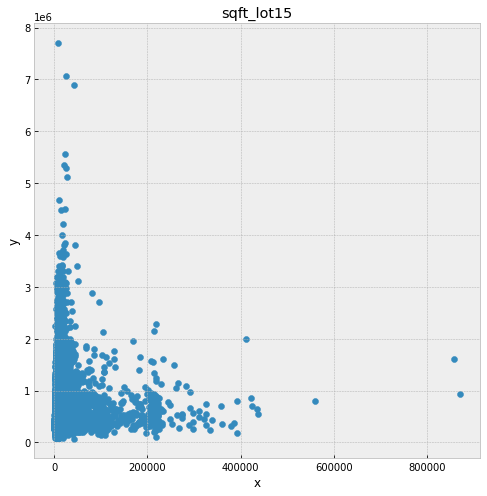

In [278]:

#Specify the independent variables.
independent = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15','sqft_lot15']
#Create a function that calls each independent variable against the Price (Y) variable.      
for i,colval in enumerate(independent):
  x = np.array(house[colval].values.reshape(-1,1))
  y = np.array(house['price'])

  figure,ax = plt.subplots(figsize=(8,8))

  plt.scatter(x,y)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(f"{colval}")

2. Fitting a best of fit line in the Plots above.

           | bedrooms |

Mean squared error: 122118841966.45
Variance score: 0.10


           | bathrooms |

Mean squared error: 97734511718.99
Variance score: 0.28


           | sqft_lot |

Mean squared error: 133864039366.13
Variance score: 0.01


           | floors |

Mean squared error: 126050392236.66
Variance score: 0.07


           | condition |

Mean squared error: 134770042775.39
Variance score: 0.00


           | grade |

Mean squared error: 74828211807.03
Variance score: 0.45


           | sqft_above |

Mean squared error: 85461759753.90
Variance score: 0.37


           | yr_built |

Mean squared error: 134555519378.40
Variance score: 0.00


           | sqft_living15 |

Mean squared error: 88706853231.09
Variance score: 0.34




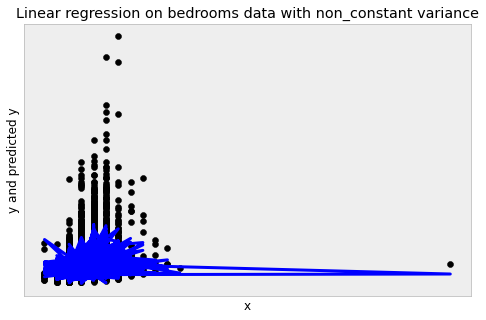

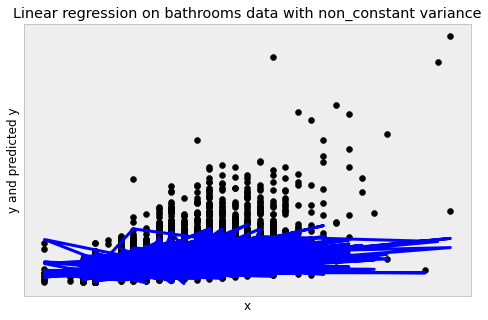

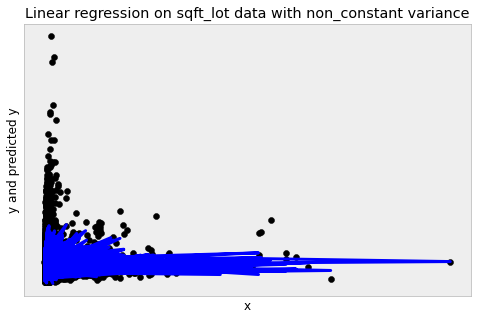

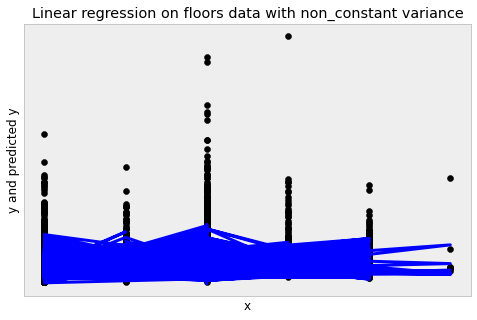

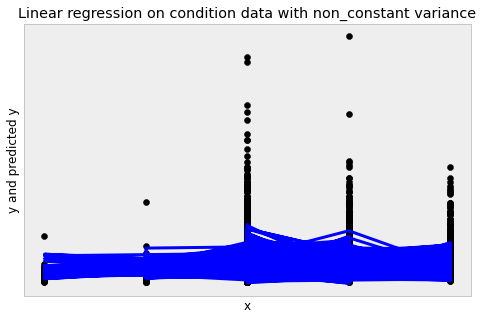

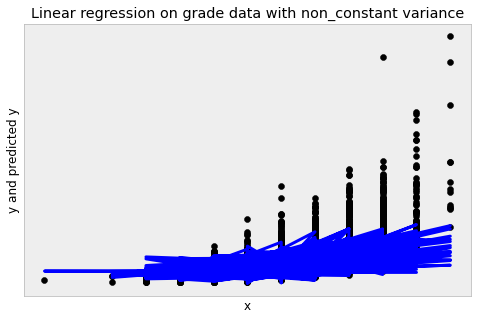

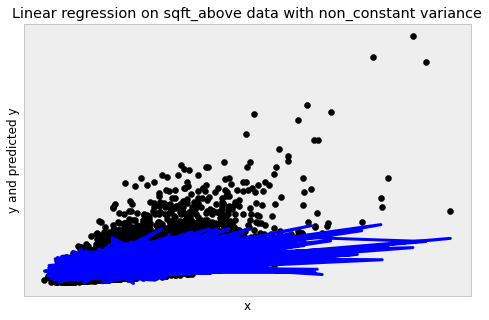

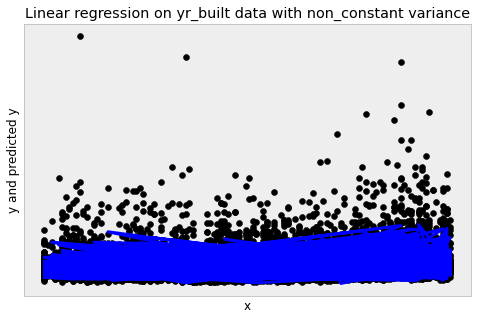

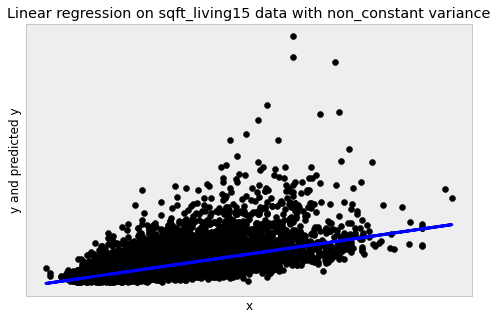

In [279]:
# Create a linear regression model to check variance and mean.
features = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built',   'sqft_living15']
for i, colval in enumerate(features):
  X = np.array(house[colval].values.reshape(-1,1))
  y = np.array(house['price'])
  lr = LinearRegression(fit_intercept=True, normalize=False)
  lr.fit(X,y)
  y_pred = lr.predict(X)
  print(f"           | {colval} |\n")
  print("Mean squared error: {0:.2f}"
        .format(np.mean((y_pred - y) ** 2)))
  print('Variance score: {0:.2f}'.format(lr.score(X, y)))
  print("\n==============================\n")

# Plot the regression to see the scatter of data points
#
for i, colval in enumerate(features):
  X = np.array(house[colval].values.reshape(-1,1))
  y = np.array(house['price'])
  figure,ax = plt.subplots(figsize=(8,5))
  plt.scatter(X, y, color='black')
  plt.plot(X, y_pred, color='blue',
         linewidth=3)
  plt.xticks(())
  plt.yticks(())
  plt.xlabel("x")
  plt.ylabel("y and predicted y")
  plt.title(f"Linear regression on {colval} data with non_constant variance")
# The line of best fit is far from perfect

In [361]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.004289
Model:                       QuantReg   Bandwidth:                   4.183e+04
Method:                 Least Squares   Sparsity:                    5.637e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21613
Time:                        16:29:09   Df Residuals:                    21611
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.408e+05   2116.507    208.281      0.000    4.37e+05    4.45e+05
x              0.8709      0.070     12.403      0.000       0.733       1.009

The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


In [0]:
# You see that our intercept is 1.8 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

In [360]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
param = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	param.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(param)

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  119799.999998   40050.000001    37229.863749    42870.136252
1  0.2  134999.999998   50000.000001    47090.040224    52909.959778
2  0.3  149999.999997   61000.000001    57588.467088    64411.532913
3  0.4  165000.000001   72500.000000    68715.999777    76284.000222
4  0.5  179999.999994   85000.000002    81011.089434    88988.910569
5  0.6  188333.333332  101666.666668    96935.251255   106398.082081
6  0.7  189574.999998  122712.500001   117862.339626   127562.660376
7  0.8  191000.000004  151999.999998   145540.451783   158459.548213
8  0.9  150000.000000  215000.000000   203126.078983   226873.921016


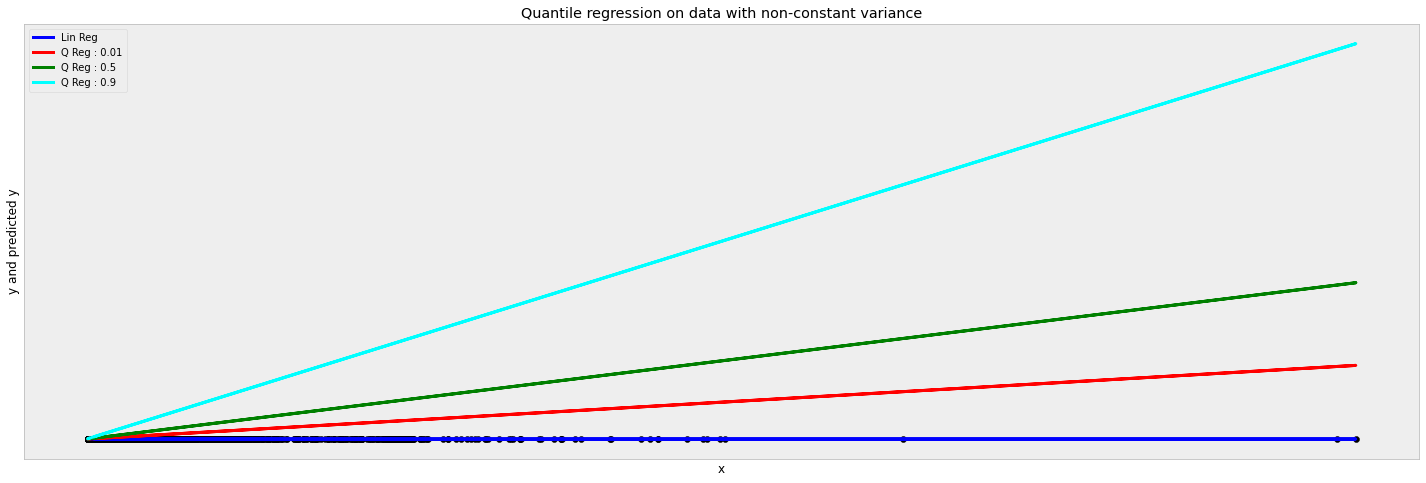

In [362]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x,y)

y_pred2 = model2.predict(x)
plt.figure(5)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.01')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x
plt.plot(x, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

# **7. Ridge Regression**

**Ridge Regression** is a **regularisation** technique for linear regression model to perform well in scenarios where there is high variance as compared to the data which is used  to train the model.

The main idea behind Ridge Regression is finding  a line that does not fit fit the training data and introduce a small amount of Bias and but in return to get a significant drop in variance.

Ridge regression advantage is to **avoid overfitting**.

Overfitting occurs wwhen the training model performs well duing training and performs badly during testing.

In [0]:
#First we import our dependencies
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [319]:
ridge = Ridge()
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

We will create a regression without the control regression without Regularisation

In [282]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 46722005847.316895 will be our indicator to determine if the regularized ridge
# regression model is superior or not.

88706853231.08984


In [0]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 


In [297]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

88711386307.44537


In [298]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'price': 313.7540555534542}

In [299]:
coef_dict_ridge = {}
for coef, feat in zip(ridge.coef_,house.columns):
    coef_dict_ridge[feat] = coef
coef_dict_ridge


{'price': 310.6475797558955}

In [287]:
#We then initialise the ridge object
ridge = Ridge()
#We will provide different values for Alpha which should be greater than 0.
parameters = {'alpha':[1e-15,1e-10,1e-3,1e-2, 1 ,5, 10, 20, 30,35,40, 45,50,55,100, 125]}
#Using GridSearchCV we will find out which alpha best suites our data.
ridge_regressor = GridSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error',cv =5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100, 125]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [288]:
#Best Params helps us identify which is the best ALpha value
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 125}
-88927382157.10922


Our best score is still far from zero hence we will use another regression same to this one and see our result. We hope it will be nearer to Zero

# **8. Lasso Regression**

**LASSO** is an accronymn  for Least Absolute Shrinkage and Selection Operator.

 It is a regression method that involves **penalizing** or adding a bias term which is mutiplied by the the absolute size slope. 
 
 The larger  the Penalty applied the further the estimates are shrunk towards zero and equal to zero.

 The Lasso regression can tell us the 'useless' independent variables in predicting our dependent variable.

In [0]:
from sklearn.linear_model import Lasso

In [318]:
lasso = Lasso()
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# Importing StandardScaler
#

from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = house[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',	'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']]
y = house[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [363]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.3426627272717925
lasso MSE: 88706853231.08986
lasso coef: [313.75405342]


In [0]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


In [292]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.3504112573966923
linear score: 0.35041125998598854
lasso MSE: 92220082315.50645
linear MSE: 92220081947.91217
lasso best estimator coef: [311.86503897]
linear coef: [311.86509076]


Text(0, 0.5, 'coefs')

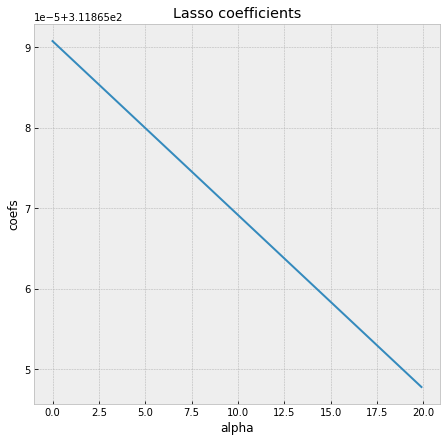

In [356]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

In [0]:
#We initialise ur regressor using the Alpha value as the one we got in the question
lasso = Lasso()
lasso = Lasso(alpha =24)
#We then fit our model
#The coef_ is that it can use each of the coeffiecients for each of its targets
lasso_coef = lasso.fit(X,y).coef_

In [0]:
_= plt.plot(range(len(independent)),lasso.fit(X,y).coef_)
_= plt.xticks(range(len(independent)),independent, rotation =45)
_= plt.ylabel("Coefficients")
plt.show()

This shows that the size of Living in square feet is the biggest feature that most people will consider.

In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha':[1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,55,60,70,80,90, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv =5)
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 0.001}
-87622384584.93173


# **9. Elastic Net Regression**

This is the type of Regression combining  the power of **Lasso regression** and **Ridge Regression**. 

Elastic Net is a mixture of L1 and L2 Regulations. 

This means  elastic net algorithms can remove weak variables altogether as **Lasso regression** or reduce them close to zero as with **Ridge regression**



In [0]:
#import dependencies

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [315]:
elastic = ElasticNet()
elastic

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [302]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

88706853231.08984


In [312]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,independent_only):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': 313.7540555534542}

In [0]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [306]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

88971188153.71774

In [307]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

121633315590.1277


In [0]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,independent):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this

Getting the best alpha value

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha':[1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,55,60,70,80,90, 100]}
lasso_regressor = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error', cv =5)
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 0.001}
-40601811669.810135
